In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

FIG_SIZE = (10, 8)
FONT_SIZE = "22"
FONT_WEIGHT = "bold"
MARKER_SIZE = 10
LINE_WIDTH = 2
GRID = True
Y_LIM_ET = (0, 1800)
Y_LIM_TPF = (0, 225)
Y_SCALE = "log"
ERRORBAR = ("ci", 95)

rc = {
    "figure.figsize": FIG_SIZE, "figure.titlesize": 20,
    "axes.labelsize": FONT_SIZE, "axes.labelweight": FONT_WEIGHT,
    "legend.fontsize": FONT_SIZE, "legend.title_fontsize": FONT_SIZE,
    "xtick.labelsize": FONT_SIZE, "ytick.labelsize": FONT_SIZE,
    "lines.markersize": MARKER_SIZE, "lines.linewidth": LINE_WIDTH,
    "axes.grid": GRID,
}

sns.set_theme(style="whitegrid", palette="colorblind", context="paper", rc=rc)

In [26]:
import pandas as pd
import numpy as np
from pathlib import Path

df = pd.read_parquet('../results/paths.parquet')

PLOT_DPI = 600
PLOT_FORMAT = "pdf"
PLOTS_DIR = Path("../plots") / "paths"
PLOTS_DIR.mkdir(parents=True, exist_ok=True)

In [27]:
cols = ["AvgPaths", "MaxPaths", "PathsTime", "Pairs"]
TOPOLOGIES = df["Topology"].unique()
NODES = df["Nodes"].unique()

group_by = ["Topology", "Nodes"]
df_paths = df.groupby(group_by)[cols].mean().reset_index()
# df_paths.sort_values(by=["Nodes"], inplace=True)
df_paths


,Topology,Nodes,AvgPaths,MaxPaths,PathsTime,Pairs
0,Barabasi-Albert,16,13.695,32.000,0.050319,238.355
1,Barabasi-Albert,32,24.910,90.980,0.585557,916.795
2,Barabasi-Albert,64,29.885,165.840,3.683929,2632.035
3,Barabasi-Albert,128,78.520,645.040,29.716270,4303.420
4,Barabasi-Albert,256,423.170,5579.005,350.884639,4989.680
5,Barabasi-Albert,512,723.155,15142.950,1206.861745,5186.880
6,Barabasi-Albert,1024,750.995,21168.750,2473.361368,5233.505
7,Erdos-Renyi,16,12.400,14.900,0.035458,238.305
8,Erdos-Renyi,32,25.585,30.775,0.464259,916.640
9,Erdos-Renyi,64,51.810,60.355,4.953697,2632.525


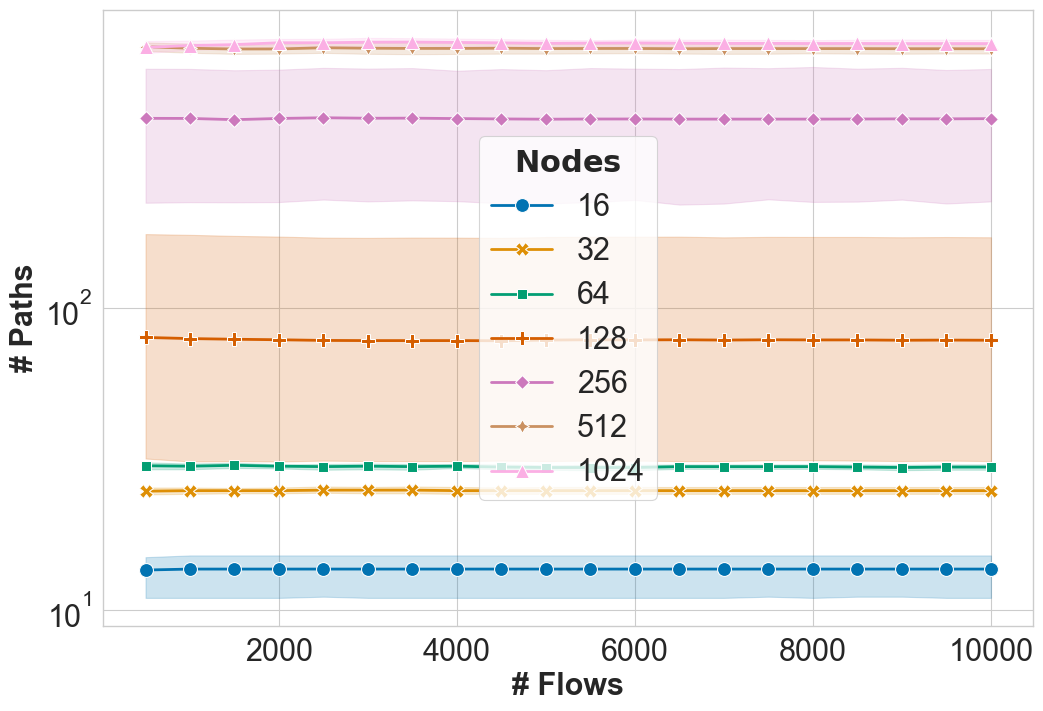

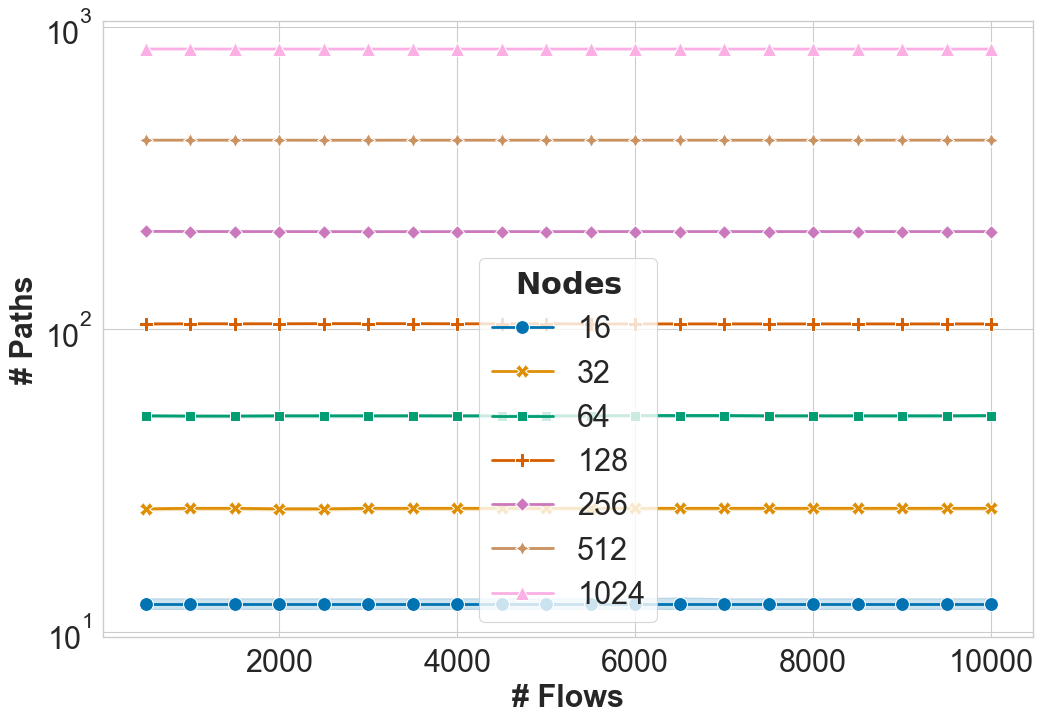

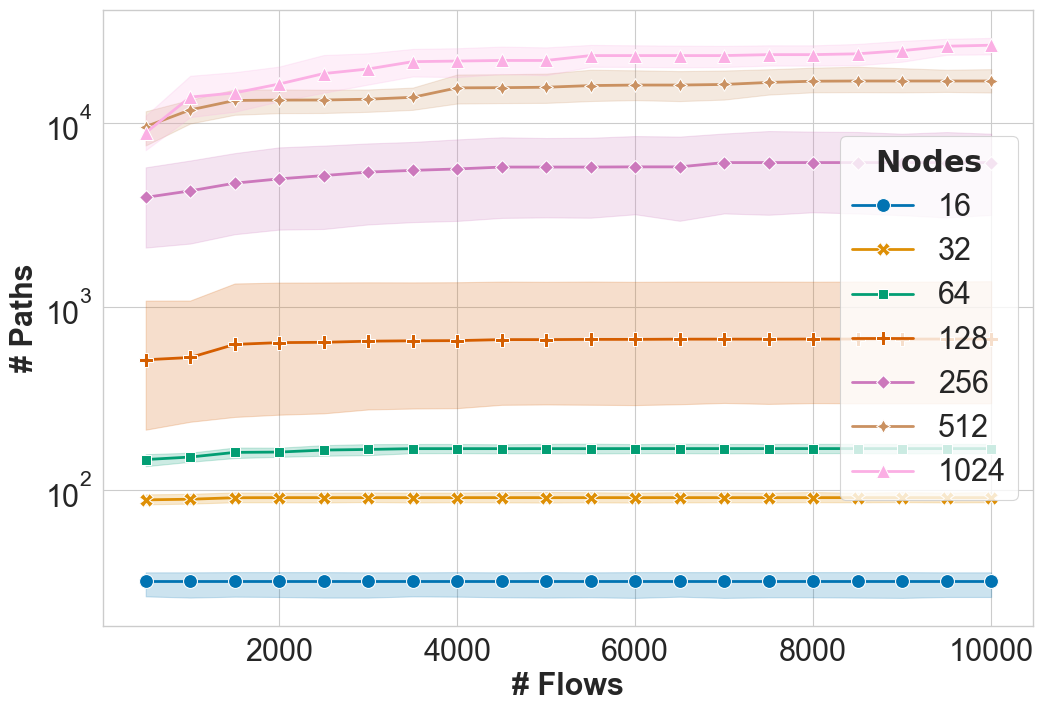

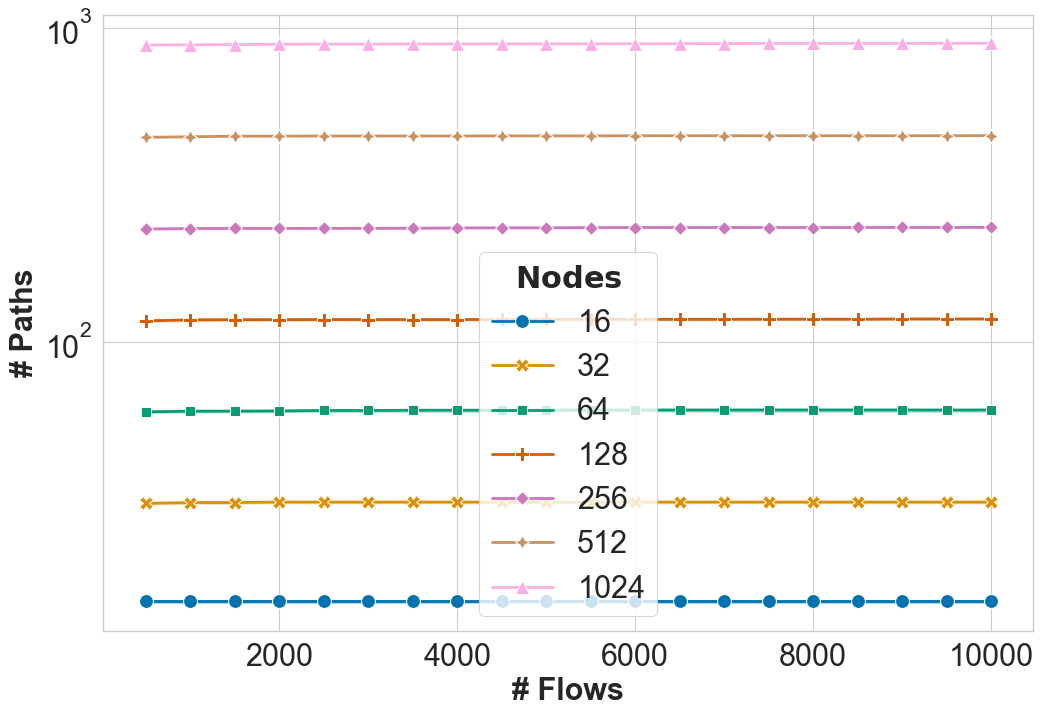

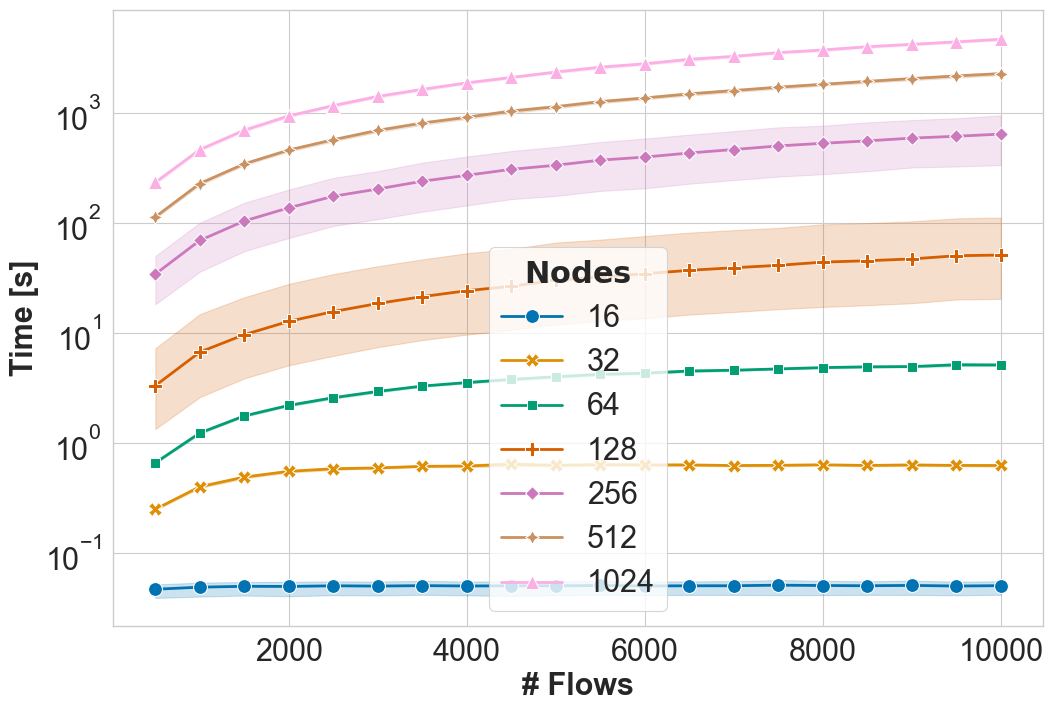

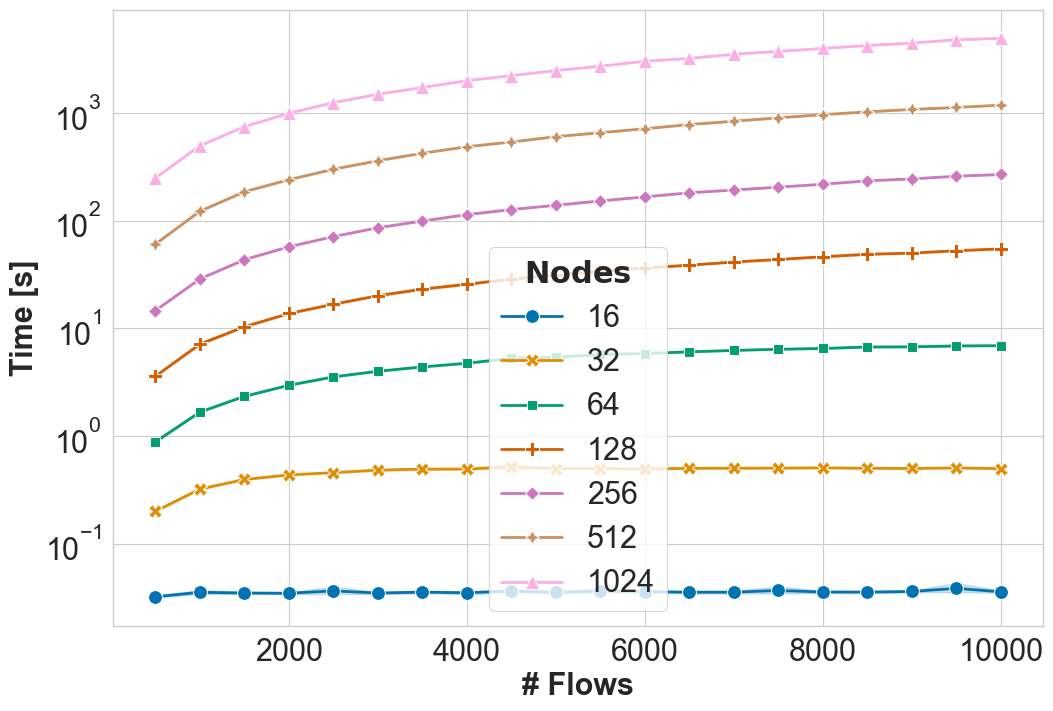

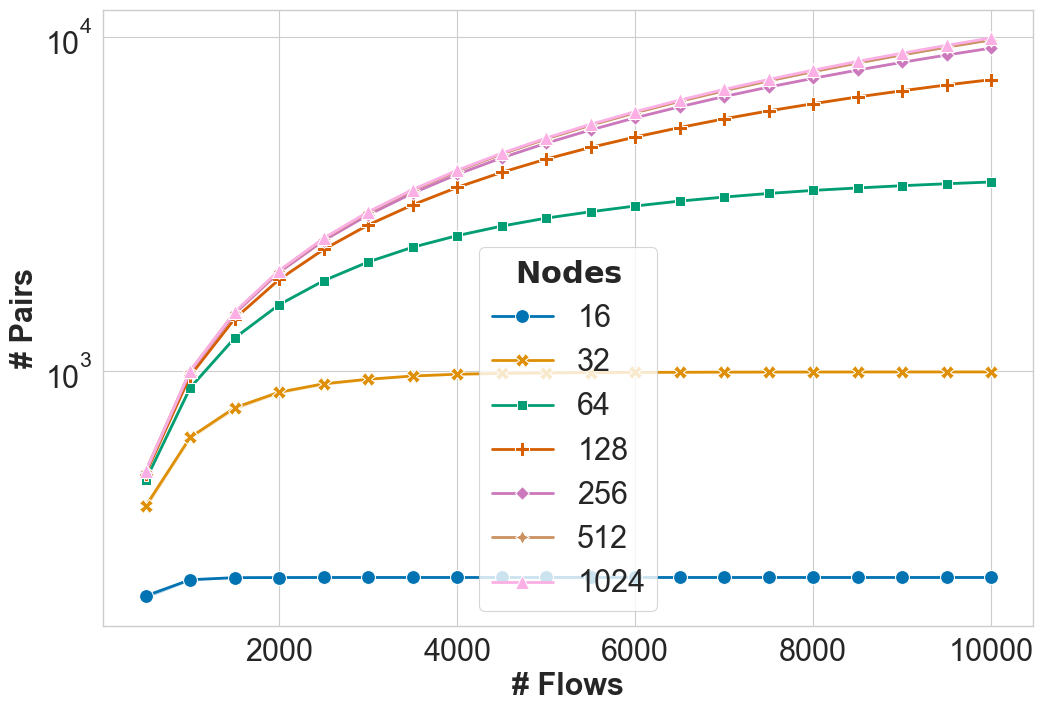

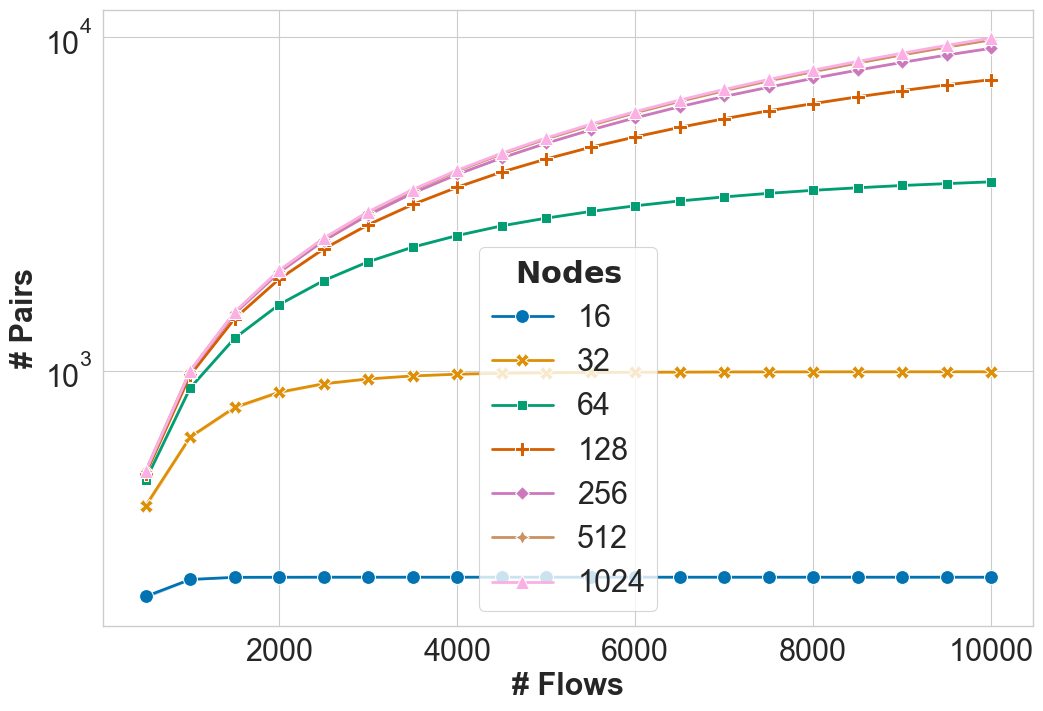

In [28]:
df["Nodes"] = df["Nodes"].astype(str)
y_labels = {
    "AvgPaths": "# Paths",
    "MaxPaths": "# Paths",
    "Pairs": "# Pairs",
    "PathsTime": "Time [s]",}

for c in cols:
    for topo in TOPOLOGIES:
        df_subset = df[df["Topology"] == topo]
        plt.figure(figsize=(12, 8))
        sns.lineplot(
            data=df_subset,
            x="Flows",
            y=c,
            hue="Nodes",
            style="Nodes",
            markers=True,
            dashes=False,
            errorbar=ERRORBAR,
        )

        plt.xlabel("# Flows")
        plt.ylabel(y_labels[c])
        plt.yscale(Y_SCALE)
        plt.legend(title=r'$\bf{Nodes}$')
        plt.grid(True)

        path = PLOTS_DIR / topo / f"{c}.{PLOT_FORMAT}"
        path.parent.mkdir(parents=True, exist_ok=True)
        plt.savefig(path, format=PLOT_FORMAT, bbox_inches="tight", dpi=PLOT_DPI)
        # plt.show()